In [1]:
import numpy as np
import matplotlib.pyplot as plt
from reliability.Distributions import Weibull_Distribution

In [2]:
# 1. Definirea componentelor (Senzori, ECU, Actuatori)
# Folosim obiectele doar pentru a stoca parametrii alpha și beta
radar = Weibull_Distribution(alpha=15000, beta=1.5)
camera = Weibull_Distribution(alpha=12000, beta=1.2)
ecu = Weibull_Distribution(alpha=50000, beta=1.0)
frana = Weibull_Distribution(alpha=20000, beta=2.5)

In [3]:
# 2. Funcție pentru calculul fiabilității folosind formula matematică pură
# Evităm complet metoda .SF() a librăriei pentru a scăpa de eroarea 't'
def weibull_reliability(alpha, beta, t):
    return np.exp(-(t / alpha)**beta)

In [4]:
# 3. Generarea axei de timp
ore = np.linspace(0, 15000, 200)

In [5]:
# 4. Calcularea fiabilității fiecărei componente
r_radar = weibull_reliability(radar.alpha, radar.beta, ore)
r_camera = weibull_reliability(camera.alpha, camera.beta, ore)
r_ecu = weibull_reliability(ecu.alpha, ecu.beta, ore)
r_frana = weibull_reliability(frana.alpha, frana.beta, ore)

In [6]:
# 5. Logica Sistemului AEB (Siguranță Activă)
# Redundanță Senzori (Paralel)
r_senzori = 1 - ((1 - r_radar) * (1 - r_camera))

# Sistemul total (Serie)
fiabilitate_sistem = r_senzori * r_ecu * r_frana

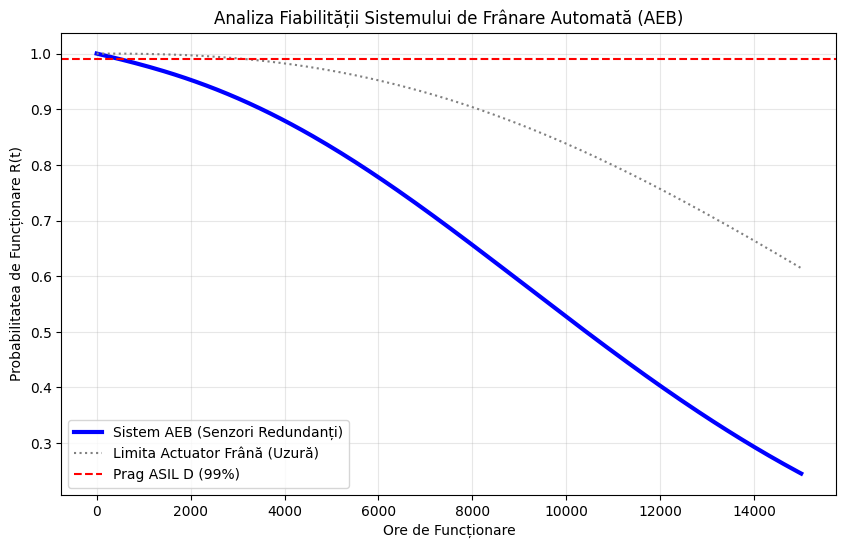

Fiabilitatea la 5000 ore este: 83.30%


In [7]:
# 6. Vizualizare Profesională
plt.figure(figsize=(10, 6))
plt.plot(ore, fiabilitate_sistem, label='Sistem AEB (Senzori Redundanți)', color='blue', linewidth=3)
plt.plot(ore, r_frana, ':', label='Limita Actuator Frână (Uzură)', color='gray')

plt.axhline(y=0.99, color='red', linestyle='--', label='Prag ASIL D (99%)')
plt.title('Analiza Fiabilității Sistemului de Frânare Automată (AEB)')
plt.xlabel('Ore de Funcționare')
plt.ylabel('Probabilitatea de Funcționare R(t)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Fiabilitatea la 5000 ore este: {fiabilitate_sistem[np.argmin(np.abs(ore-5000))]*100:.2f}%")

# modifica alpha sau beta direct în formulă pentru a simula diferite condiții de mediu (de exemplu, cum scade alpha la temperaturi extreme).
### Modelarea Matematică a Sistemului AEB
Pentru a asigura integritatea calculului, am utilizat funcția de supraviețuire Weibull standard:
$$R(t) = e^{-(t/\alpha)^\beta}$$
Sistemul este modelat ca o combinație de:
1. **Redundanță activă** pentru senzori (Radar + Cameră).
2. **Configurație în serie** pentru componentele critice (ECU și Actuator).
Cost vs. Siguranță: Merită să punem senzori mai scumpi ($\alpha$ mai mare) sau e mai eficient să dublăm senzorii ieftini (redundanță)?
Intervale de mentenanță: Poți identifica vizual punctul în care curba coboară sub pragul de 99% (standardul pentru funcții critice de siguranță).